## Baseball Case Study
### Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 
##### Input features:
Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
##### Output:
Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler() 
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import model_selection
from pandas.plotting import scatter_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

### Load Dataset

In [2]:
df = pd.read_csv(r"baseball.csv")
df.head() # DataFrame.head is used to show the 1st five columns of the dataset.

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


##### Observations:
Features:
* Runs - R
* At Bats - AB
* Hits - H
* Doubles - 2B
* Triples - 3B
* Homeruns - HR
* Walks - BB
* Strikeouts - SO
* Stolen Bases - SB
* Runs Allowed - RA
* Earned Runs - ER
* Earned Run Average - ERA
* Complete Games - CG
* Shutouts - SHO
* Saves - SV
* Errors - E

Label/Output:
* Number of predicted wins - (W)

### Shape of the Dataset

In [3]:
df.shape

(30, 17)

Here, the dataset contain
1. 30 rows
2. 17 columns

## Exploratory Data Analysis:

## Check the concise summary of the dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


##### Observation:
Here we can observe that:
* All the features except "ERA" have discrete data whereas "ERA" have continuous data.
* Datatypes - 
              1. ERA = float64
              2. Rest of all - int64 

## Check for total number of null values

In [5]:
df.isnull().sum().sum()

0

There is no null values in the dataset.

## Check for statistical summary of the dataframe

In [6]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


##### Observation:
Here, we found the the numbers of count of each feature along with mean, standard deviation, minimum value, 1st Quantile, 2nd Quantile, 3rd Quantile and maximum value of every features. 

We can even find the Inter Quantile Range (IQR) by calculating by formula:
IQR = Q3 – Q1.

## Visualizing

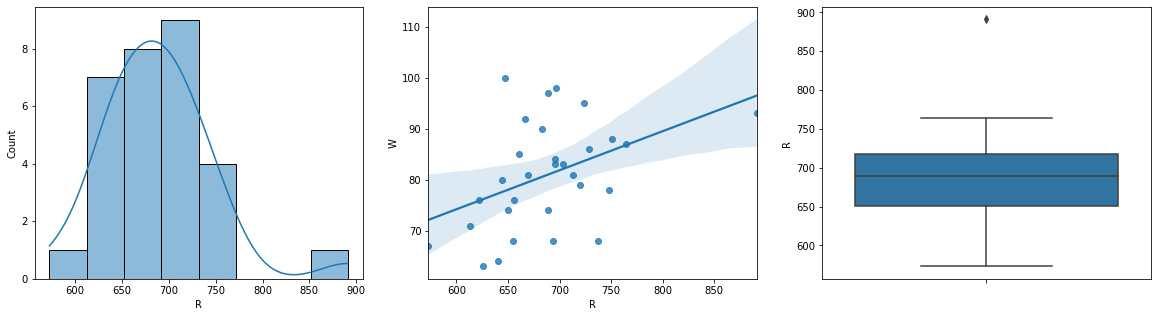

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['R'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['R'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['R'],data=df)
plt.show()

##### Observation:
1. Run and win are linearly correlated. 
2. Outliers are present between 850 and 900

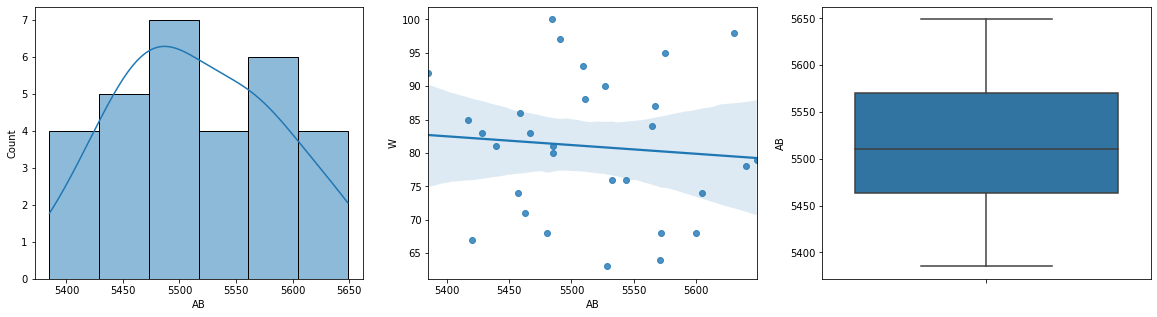

In [8]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['AB'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['AB'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['AB'],data=df)
plt.show()

##### Observation: 
1. At balls is very weekly related to Wins With no outliers.

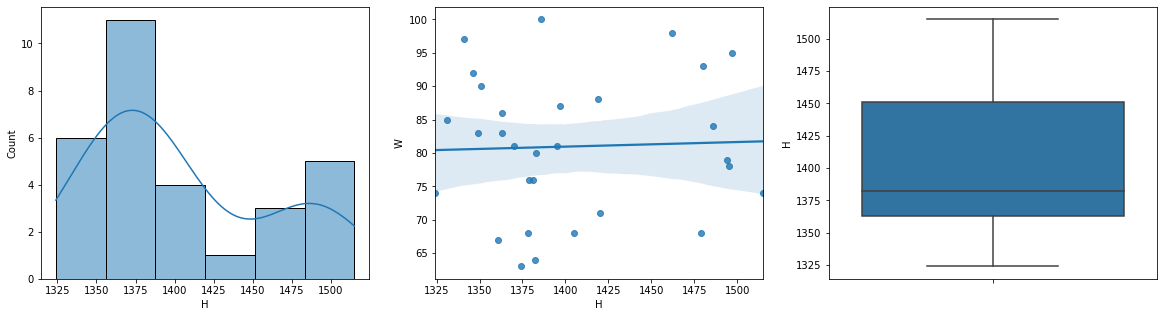

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['H'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['H'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['H'],data=df)
plt.show()

##### Observation:
1. Hits are also very weekly related to winning with no outliers

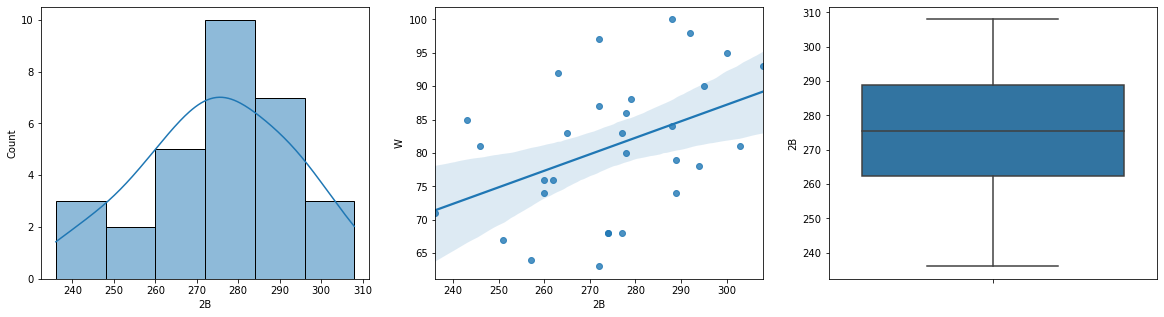

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['2B'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['2B'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['2B'],data=df)
plt.show()

##### Observation:
1. Doubles are linearly related with Wins, with no outlier
2. Data is left-skewed

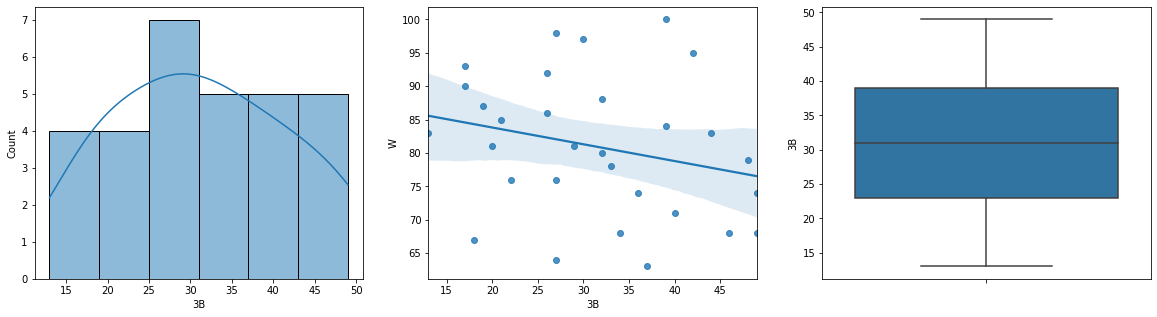

In [11]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['3B'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['3B'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['3B'],data=df)
plt.show()

##### Observation:
1. Triple has very weak negative correlations with win with no outlier
2. Data is right-skewed

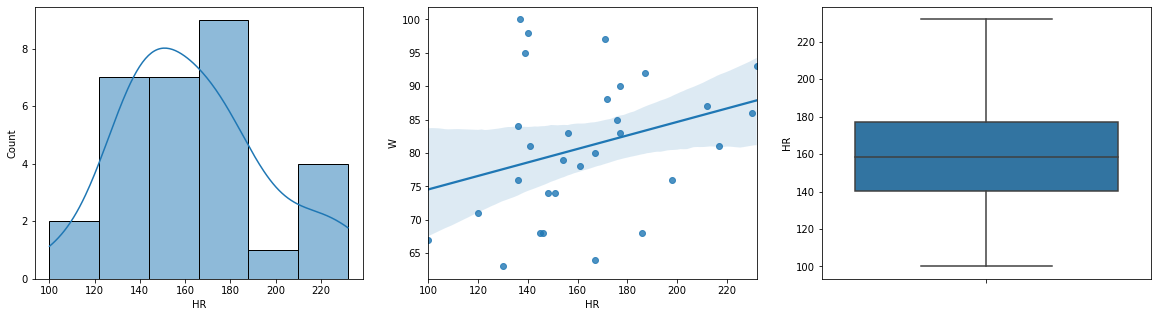

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['HR'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['HR'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['HR'],data=df)
plt.show()

##### Observation:
1. The home run has a very low correlation with wins with no lot of outliers
2. Data is right-skewed


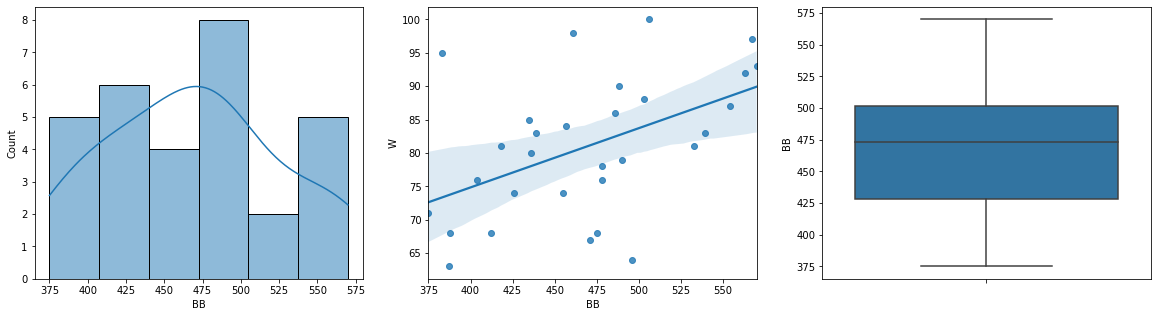

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['BB'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['BB'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['BB'],data=df)
plt.show()

##### Observation:
1. Walk is lightly correlated to win with no outlier

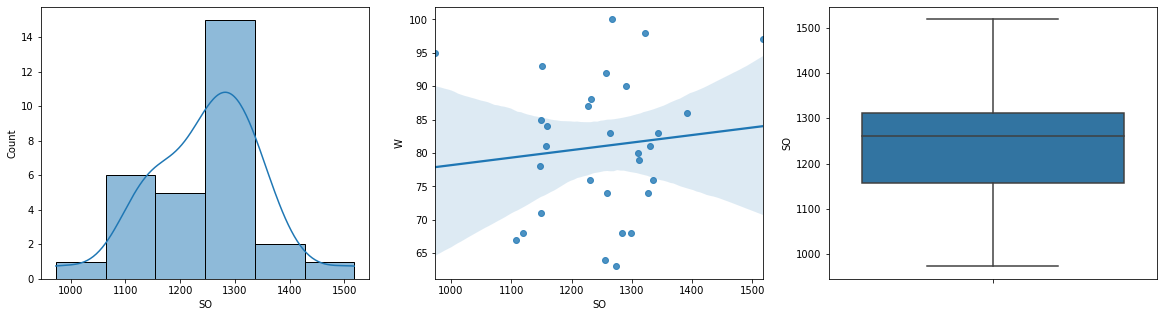

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['SO'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['SO'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['SO'],data=df)
plt.show()

##### Observation:
1. Strikeout is not correlated to win with no outlier 
2. The dataset is left-skewed.

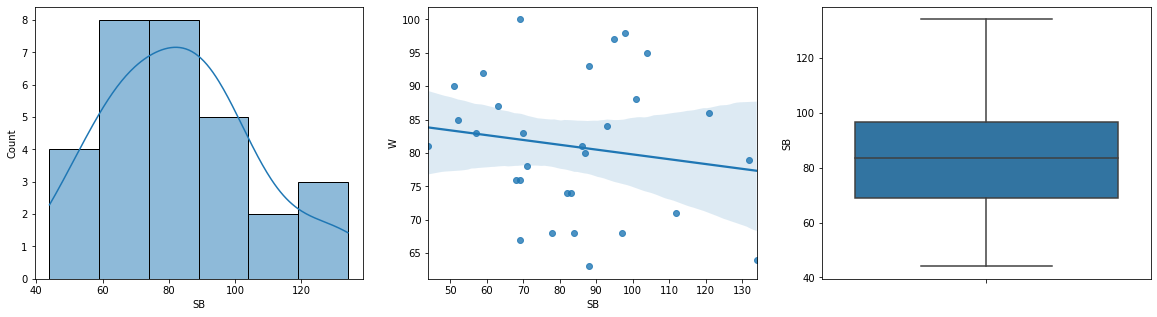

In [15]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['SB'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['SB'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['SB'],data=df)
plt.show()

##### Observation:
1. Stolen Bases is not correlated to win with no outlier

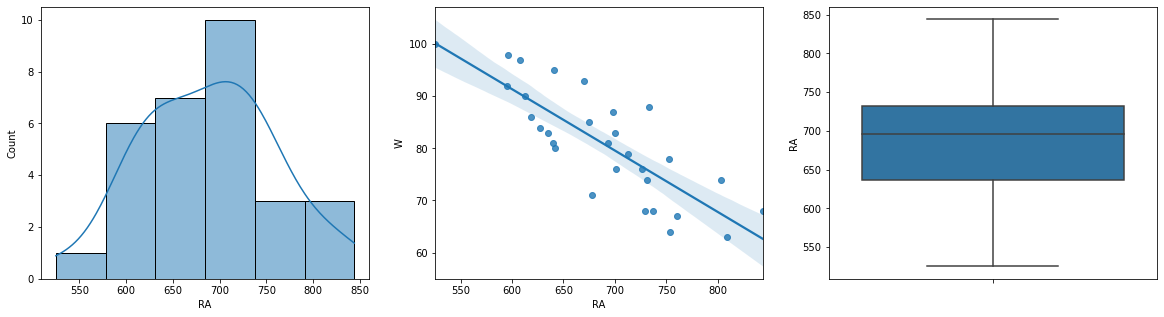

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['RA'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['RA'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['RA'],data=df)
plt.show()

##### Observation:
1. Runs Allowed is highly correlated to win with no outlier

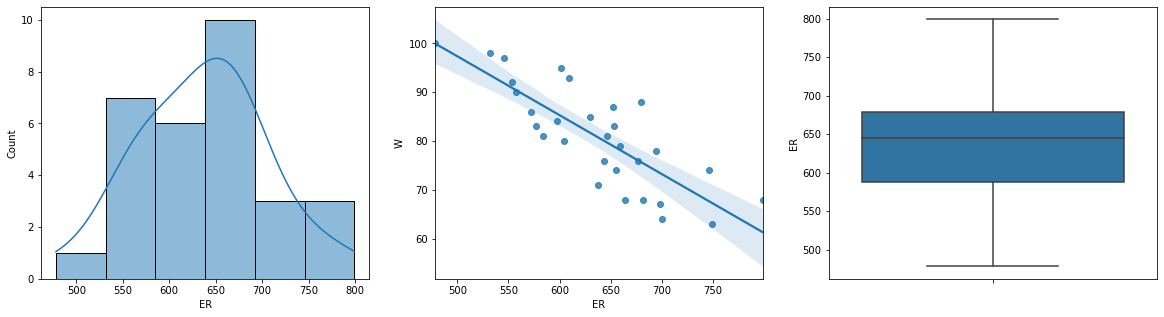

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['ER'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['ER'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['ER'],data=df)
plt.show()

##### Observation:
1. Earned Runs is highly correlated to win with no outliers


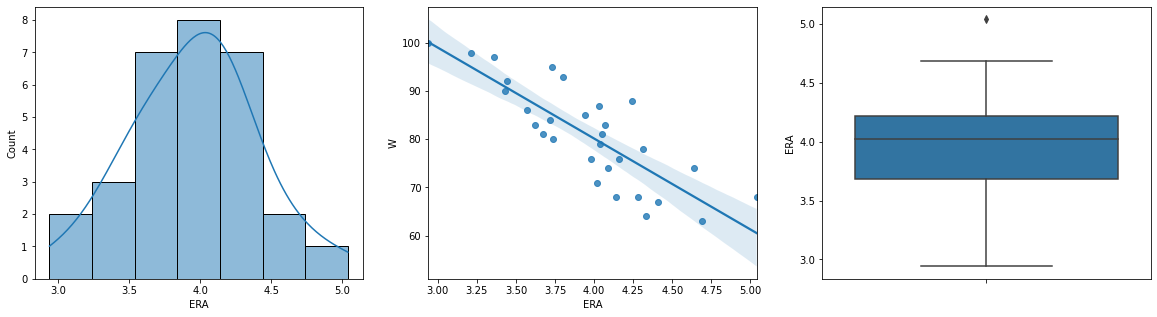

In [18]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['ERA'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['ERA'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['ERA'],data=df)
plt.show()

##### Observation:
1. Earned Run Average (ERA) is highly correlated to win 
2. Data is right-skewed with minimum outliers are present at higher value

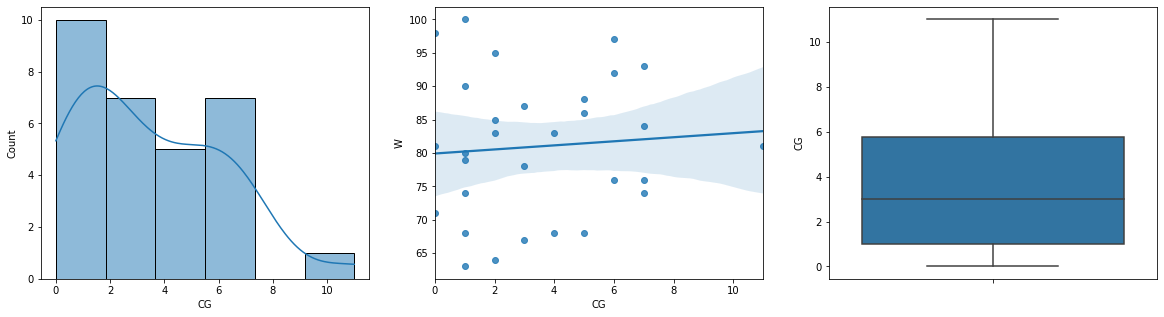

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['CG'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['CG'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['CG'],data=df)
plt.show()

##### Observation:
1. Complete Game is not correlated to win with no outliers
2. Data is right-skewed.


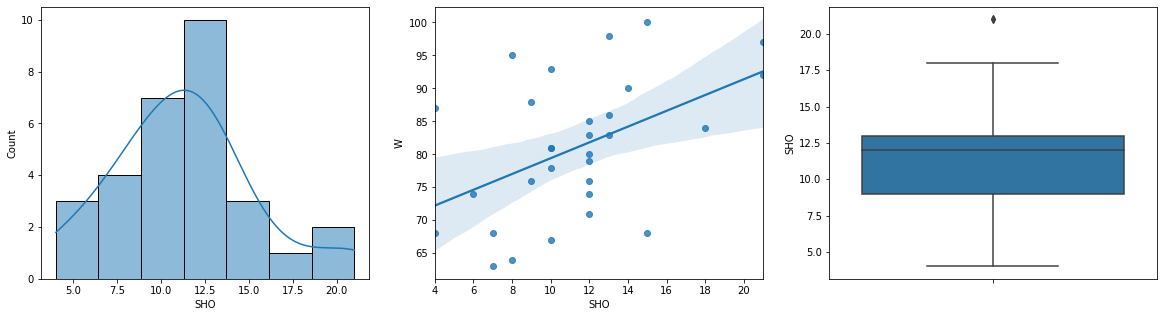

In [20]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['SHO'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['SHO'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['SHO'],data=df)
plt.show()

##### Observation:
1. Shutouts are highly correlated to win with minimum outlier 
2. Data is right-skewed.

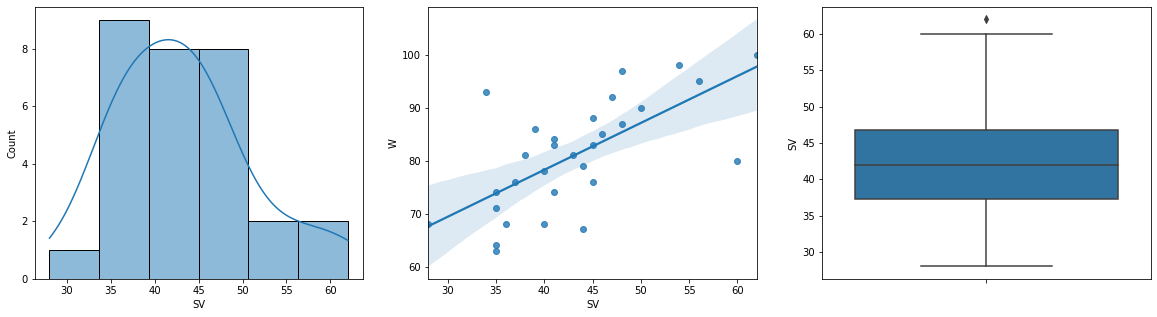

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['SV'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['SV'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['SV'],data=df)
plt.show()

##### Observation:
1. Saves are lightly correlated to win with minimum outliers-skewed.

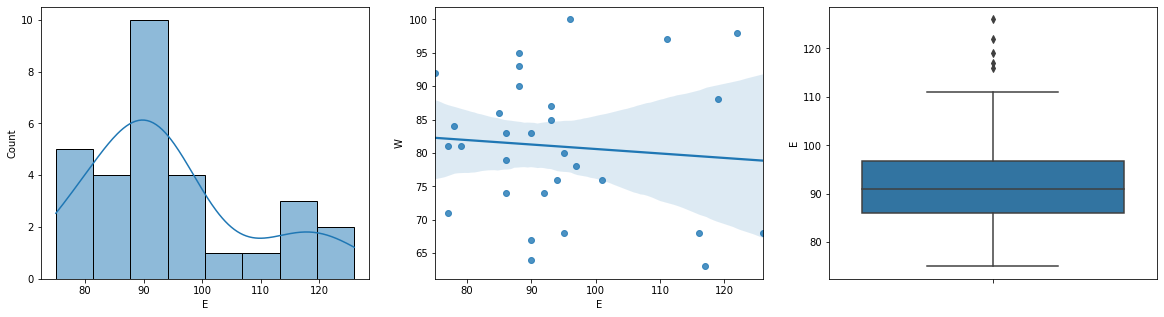

In [22]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x=df['E'],data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x=df['E'],y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y=df['E'],data=df)
plt.show()

##### Observation:
1. Errors are not correlated to win.
2. The data has outliers 
3. Data is right-skewed.

Let's check the correlation in the dataset using different methods.

method used: {'spearman'}

And the range of correlation is from -1(negative correlation) to +1(positive correlation)

In [23]:
df.corr(method='pearson')

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


Let's use seaborn heatmap for a greater visual understanding.

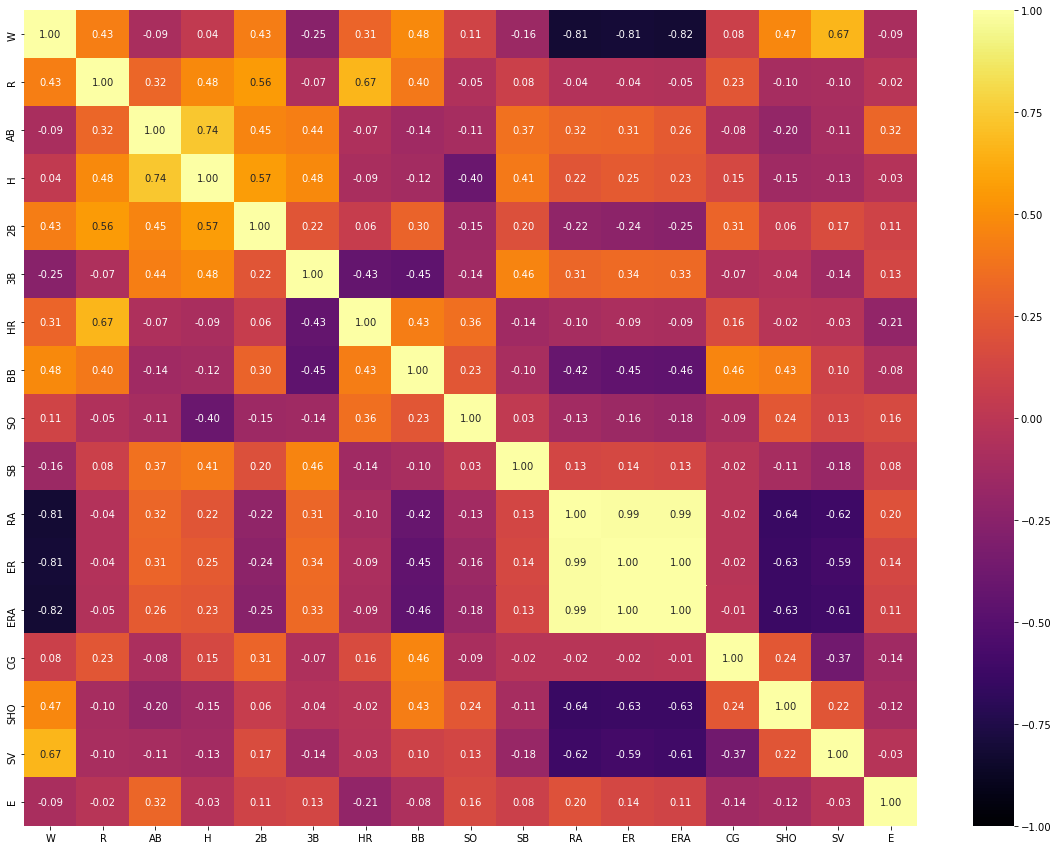

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap="inferno", vmin = -1, vmax = +1, fmt='.2f')
plt.show()

## Data Preprocessing

Removing Columns which have very less to low linear correlation with number of wins.

In [25]:
data = df.drop(['AB','H','SO','SB','CG','ERA','RA','E'], axis=1, inplace=True)

In [26]:
df.head()

,W,R,2B,3B,HR,BB,ER,SHO,SV
0,95,724,300,42,139,383,601,8,56
1,83,696,277,44,156,439,653,12,45
2,81,669,303,29,141,533,584,10,38
3,76,622,260,27,136,404,643,9,37
4,74,689,289,49,151,455,746,12,35


## Outlier handling

In [27]:
from scipy import stats

In [28]:
# zscore = (x-mean)/std
from scipy.stats import zscore

zscore = zscore(df[['R','SHO', 'SV']])
abs_z_score = np.abs(zscore)

filtering_entry = (abs_z_score<3).all(axis=1)

df = df[filtering_entry]
df.describe()

,W,R,2B,3B,HR,BB,ER,SHO,SV
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,80.551724,681.241379,273.586207,31.793103,161.275862,465.620690,636.758621,11.344828,43.379310
std,10.384006,45.357040,17.269952,10.276114,29.600792,54.728821,71.195734,4.185655,7.816712
min,63.000000,573.000000,236.000000,13.000000,100.000000,375.000000,478.000000,4.000000,28.000000
25%,74.000000,650.000000,262.000000,26.000000,140.000000,426.000000,584.000000,9.000000,38.000000
50%,81.000000,689.000000,274.000000,32.000000,156.000000,471.000000,646.000000,12.000000,43.000000
75%,87.000000,713.000000,288.000000,39.000000,177.000000,496.000000,680.000000,13.000000,47.000000
max,100.000000,764.000000,303.000000,49.000000,230.000000,567.000000,799.000000,21.000000,62.000000


In [29]:
df.head()

,W,R,2B,3B,HR,BB,ER,SHO,SV
0,95,724,300,42,139,383,601,8,56
1,83,696,277,44,156,439,653,12,45
2,81,669,303,29,141,533,584,10,38
3,76,622,260,27,136,404,643,9,37
4,74,689,289,49,151,455,746,12,35


## Hypothesis 1: Not one of the columns are normal distriuted
This will be evaluated by using the p-value measurement:

𝑝=2min{Pr(𝑇≥𝑡∣𝐻0),Pr(𝑇≤𝑡∣𝐻0)}  for a two-sided test.

If distribution  𝑇  is symmetric about zero, then  𝑝=Pr(|𝑇|≥|𝑡|∣𝐻0)𝑝=Pr(|𝑇|≥|𝑡|∣𝐻0)

In [30]:
# Shapiro-Wilk Test
for col in df:
    stat, p = shapiro(df[col])
    print("----------------------------------------------")
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

----------------------------------------------
W
Statistics=0.972, p=0.610
Sample looks Gaussian (fail to reject H0)
----------------------------------------------
R
Statistics=0.986, p=0.958
Sample looks Gaussian (fail to reject H0)
----------------------------------------------
2B
Statistics=0.974, p=0.658
Sample looks Gaussian (fail to reject H0)
----------------------------------------------
3B
Statistics=0.967, p=0.491
Sample looks Gaussian (fail to reject H0)
----------------------------------------------
HR
Statistics=0.972, p=0.622
Sample looks Gaussian (fail to reject H0)
----------------------------------------------
BB
Statistics=0.967, p=0.493
Sample looks Gaussian (fail to reject H0)
----------------------------------------------
ER
Statistics=0.987, p=0.974
Sample looks Gaussian (fail to reject H0)
----------------------------------------------
SHO
Statistics=0.949, p=0.173
Sample looks Gaussian (fail to reject H0)
----------------------------------------------
SV
Statist

#### On the basis of the knowledge gained from above the data in columns are not normal distributed.

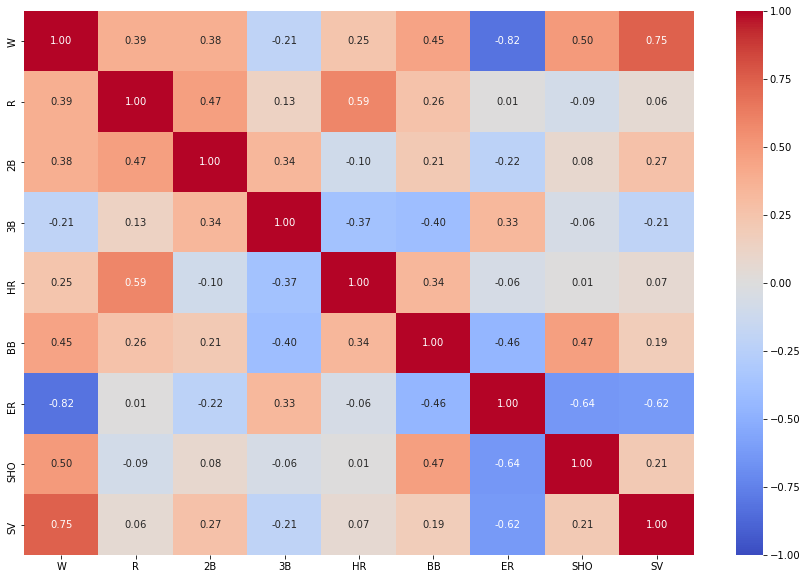

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", vmin = -1, vmax = +1, fmt='.2f')
plt.show()

<Figure size 3600x3600 with 0 Axes>

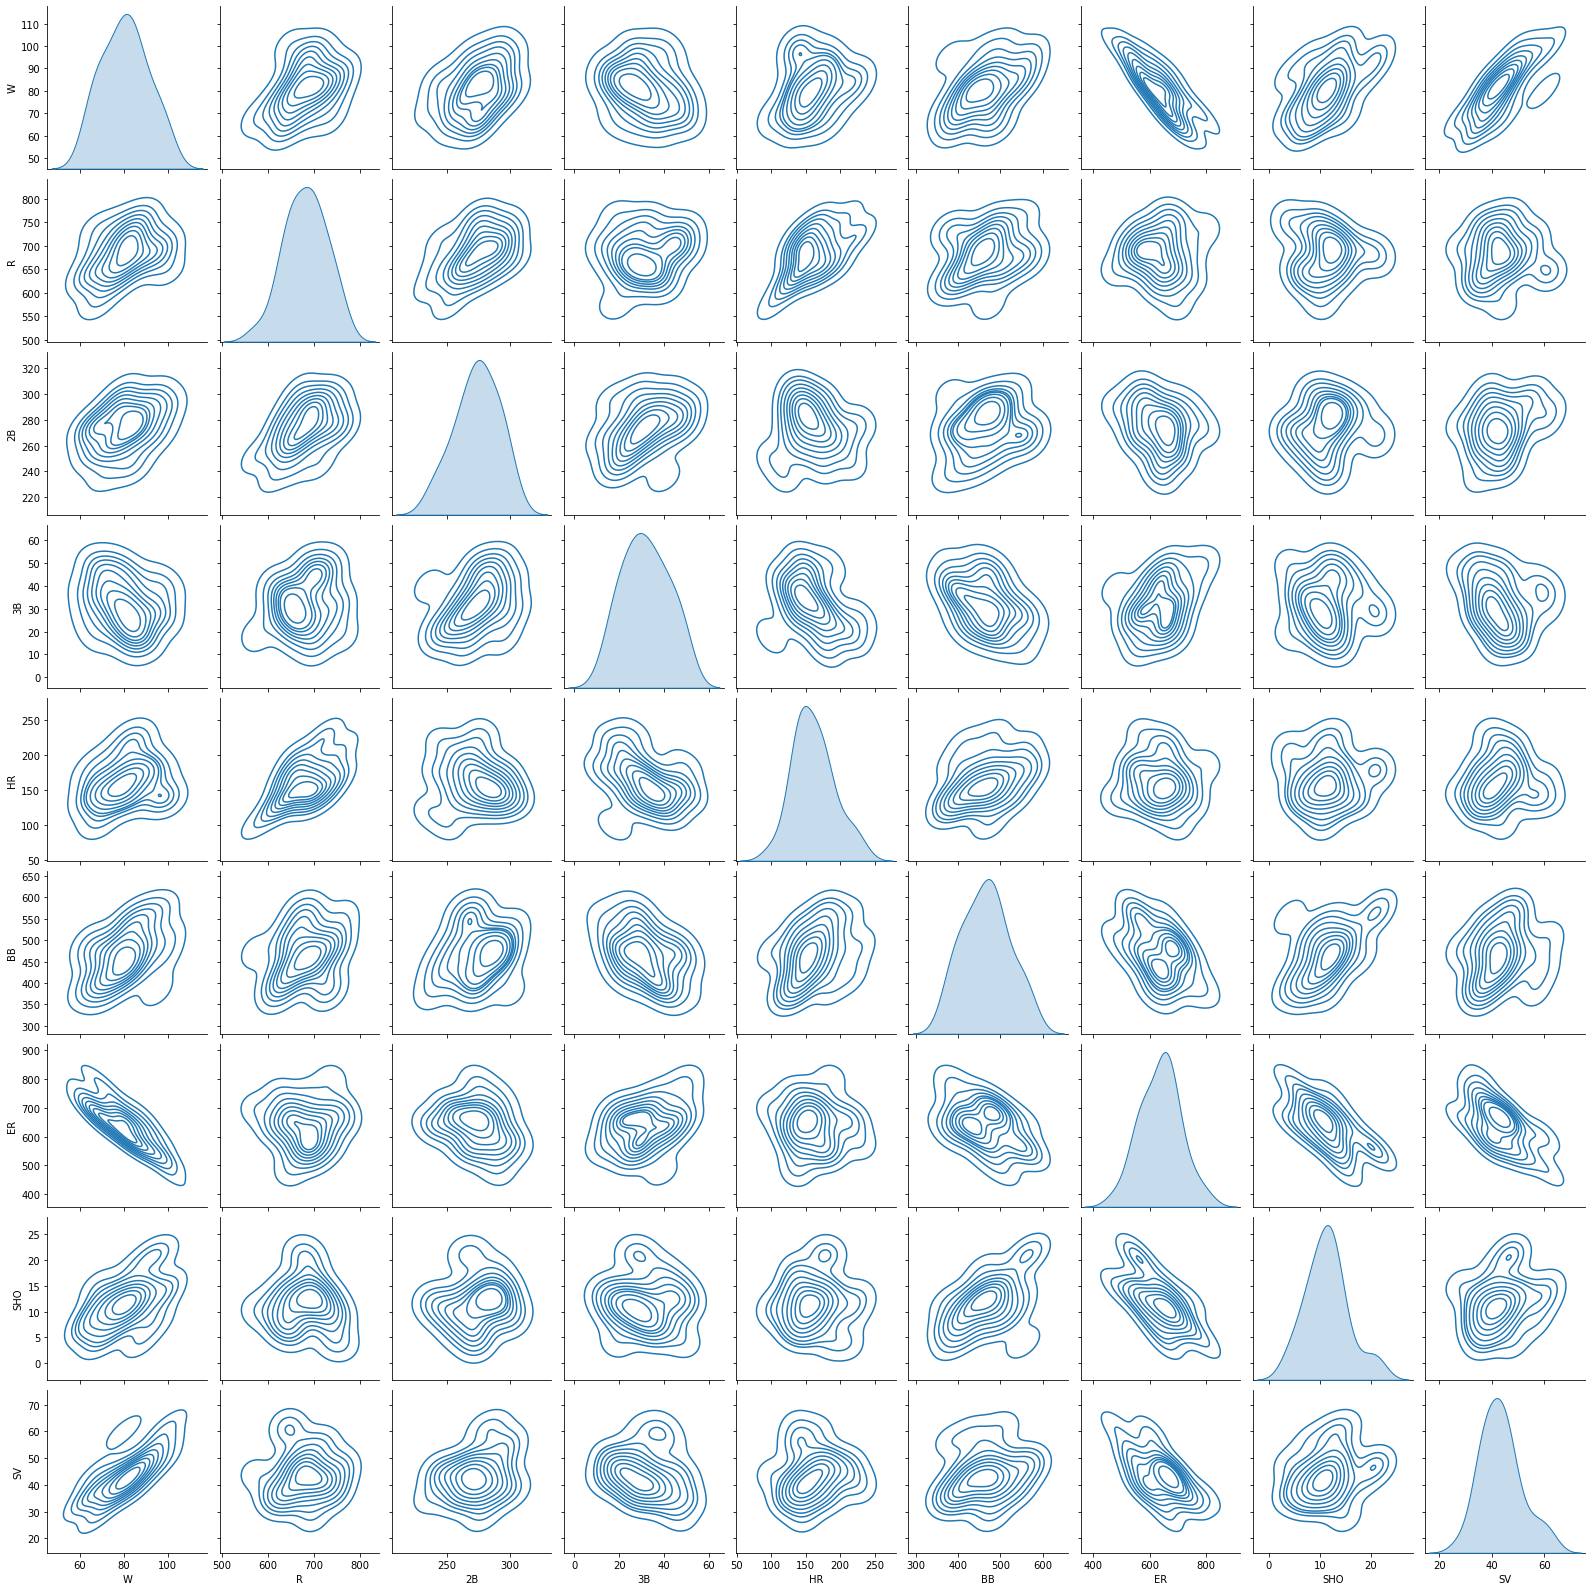

In [32]:
plt.figure(figsize=(50,50))
sns.pairplot(df,kind='kde')
plt.show()

##### Observation:
1. The pair plot shows the correlation between each features, lets check more with df.corr() and heat maps.

## Split train and test dataset

In [33]:
x = df.drop(columns = ['W'], axis = 1)
y = df[['W']]
x=df[['R','2B','3B','HR','BB', 'ER', 'SHO', 'SV']]
#X = df.drop(['W'], axis=1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [35]:
x.head()

,R,2B,3B,HR,BB,ER,SHO,SV
0,724,300,42,139,383,601,8,56
1,696,277,44,156,439,653,12,45
2,669,303,29,141,533,584,10,38
3,622,260,27,136,404,643,9,37
4,689,289,49,151,455,746,12,35


## Preparing the model for testing

In [36]:
# Create empty list and append each model to list
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('RFG', RandomForestRegressor()))

# Empty list for results of the evaluation
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=21,shuffle=True)
    cv_results = cross_val_score(model, y_train, y_train, cv=kfold, scoring='explained_variance')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 1.000000 (0.000000)
LASSO: 0.999925 (0.000012)
EN: 0.999925 (0.000012)
KNN: 0.762309 (0.385766)
CART: 0.891251 (0.160871)
GBM: 0.891245 (0.160885)
XGB: 0.932860 (0.116220)
RFG: 0.928428 (0.101671)


In [37]:
print(cv_results)

[0.99842559 0.99589344 0.93337024 0.99687229 0.9949719  0.900775
 0.66649375 0.8319     0.97332222 0.992256  ]


In [38]:
#creating linear regression as a baseline model
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
score = model.score(x_train, y_train)
print('Training Score:', score)
score = model.score(x_test, y_test)
print('Testing Score:', score)

Training Score: 0.9279989212055092
Testing Score: 0.7502144153345784


In [39]:
#Finding out the mean absolute error
mae = np.round(mean_absolute_error(y_test,y_pred),3)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 3.221


In [40]:
#Finding out the mean Squarred Error
mse = np.round(mean_squared_error(y_test,y_pred),3)
print('Mean Squared Error:', mse)

Mean Squared Error: 13.655


In [41]:
#Finding out the R2 Score
score = np.round(r2_score(y_test,y_pred),3)
print('R2 Score:', score)

R2 Score: 0.75


## Save model

In [42]:
import joblib
joblib.dump(model,'Baseball.pkl')

['Baseball.pkl']